# ***Iris Flower Inbuilt dataset using Logistic Regression (Multiclass Classification), Random Forest & Support Vector Machine! ***

The dataset consists of 150 samples from three species of iris flowers:

Setosa
Versicolor
Virginica


---


Each sample has four numerical features:

Sepal length (in cm)
Sepal width (in cm)
Petal length (in cm)
Petal width (in cm)


---


Each row in the dataset represents one flower, and the label (or target) is the species of the flower.


In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

from sklearn.metrics import accuracy_score

iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [165]:
#classified using the feature_names

iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [166]:
#for convienence lets change the feature name column into a dataframe

df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [167]:
#we need target values in dataframe to predict the spieces

df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [168]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [169]:
#displaying the target value with 0 - setosa
df[df.target==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [170]:
#displaying the target value with 1 - versicolor
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [171]:
#displaying the target value with 2 - virginica
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [172]:
#creating a new column named Flower_name based on target value

df['Flower Name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [173]:
#creating seperate dataframes for each species of flower

df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

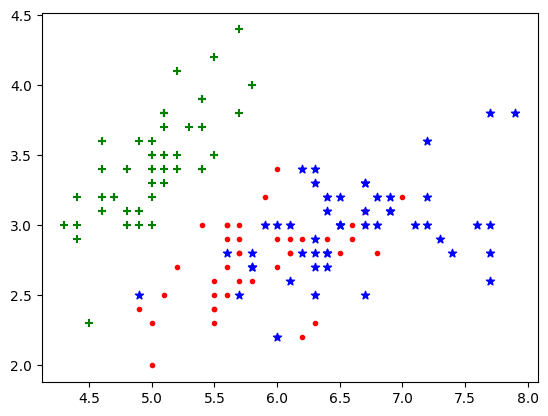

In [174]:
#ploting sepal length with sepal width for analying the classification

plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='red', marker='.')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='blue', marker='*')

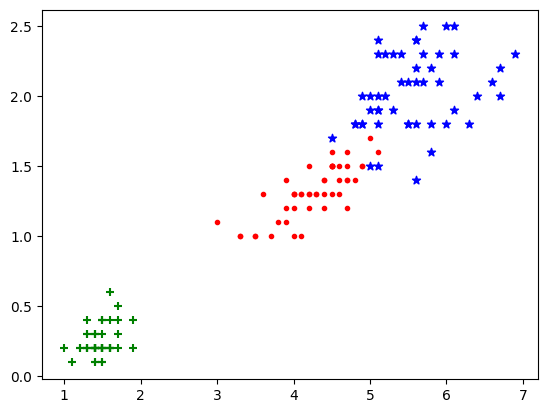

In [175]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='red', marker='.')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='blue', marker='*')

# **Logistic Regression**


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['target', 'Flower Name'], axis='columns')
Y = df.target

In [ ]:
X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
model_lr = LogisticRegression()

In [ ]:
model_lr.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
model_lr.score(X_test, Y_test)

1.0

In [ ]:
model_lr.predict([[6.1, 3.3, 4.4, 1.0]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X, Y,cv=3)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


array([0.96, 0.96, 0.94])

Average Score for Logistic Regression for three different test and train sets are = 0.95

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=40)

In [ ]:
model_rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=40)

In [ ]:
model_rf.score(X_test, Y_test)

0.9333333333333333

In [ ]:
#This code is used to evaluate the performance of a trained random forest model (model_rf) on a test dataset (X_test, Y_test).
#Specifically, it calculates the confusion matrix, which is a table that summarizes the performance of a
#classification model by comparing the predicted labels to the actual labels.


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, model_rf.predict(X_test))
cm

array([[ 8,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 12]])

Text(95.72222222222221, 0.5, 'Truth')

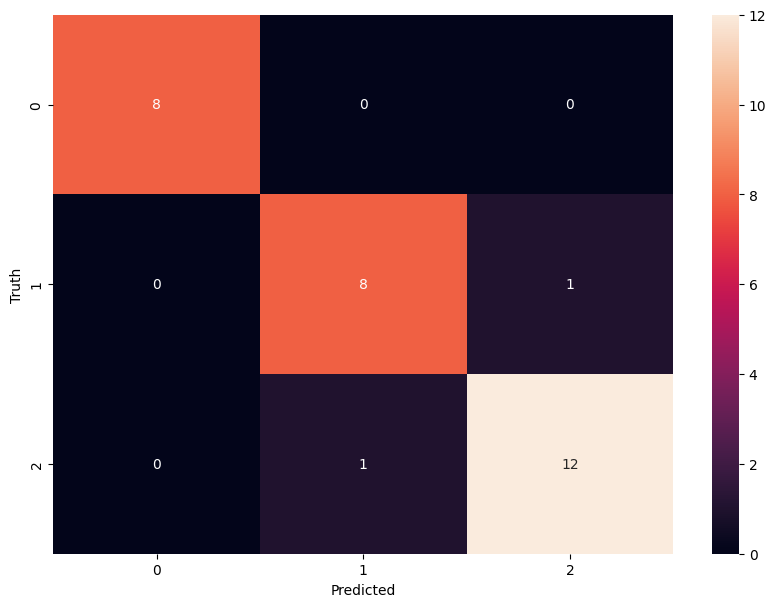

In [ ]:
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(RandomForestClassifier(n_estimators=40), X, Y, cv=3)

array([0.98, 0.94, 0.96])

Average Score using Random Forest for three different test and train sets are = 0.97

# **Support Vector Machine**

Support Vector Machine (SVM) is a **supervised machine learning algorithm** used for both classification and regression, aiming to find the optimal hyperplane that best separates data points into different classes by maximizing the margin between them.

In [176]:
X = df.drop(['target', 'Flower Name'], axis='columns')
Y = df.target

In [177]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [178]:
from sklearn.svm import SVC
model_svm = SVC()

In [179]:
model_svm.fit(X_train, Y_train)

SVC()

In [180]:
model_svm.score(X_test, Y_test)

0.9333333333333333

In [181]:
from sklearn.model_selection import cross_val_score

In [182]:
cross_val_score(SVC(gamma='auto'), X, Y, cv=3)

array([0.98, 0.98, 0.96])

Average Score by using Support Vector Method for three different test and train sets are = 0.96

### **Hyper Parameter Tuning**

In [183]:
#importing GirdSearchCV to find the best combination of parameters
#for your model

from sklearn.model_selection import GridSearchCV

model_gs = GridSearchCV(SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)



In [184]:
model_gs.fit(X, Y)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': [1, 10, 20], 'kernel': ['rbf', 'linear']})

In [185]:
model_gs.cv_results_

{'mean_fit_time': array([0.0033637 , 0.00291419, 0.00314798, 0.00245862, 0.00286479,
        0.0035912 ]),
 'std_fit_time': array([9.52204198e-04, 7.08509611e-04, 3.50549703e-04, 7.00323317e-05,
        2.46646545e-04, 6.36945854e-04]),
 'mean_score_time': array([0.00211821, 0.00255857, 0.00240736, 0.00182233, 0.00260787,
        0.00267673]),
 'std_score_time': array([4.66449912e-04, 1.00627234e-03, 4.89800723e-04, 4.46487664e-05,
        7.75716608e-04, 5.34396873e-04]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value=999999),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value=np.str_('?'),
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
 

In [186]:
#transfering those scores into a dataframe
df = pd.DataFrame(model_gs.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003364,0.000952,0.002118,0.000466,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.002914,0.000709,0.002559,0.001006,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.003148,0.000351,0.002407,0.000490,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.002459,0.000070,0.001822,0.000045,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.002865,0.000247,0.002608,0.000776,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5
5,0.003591,0.000637,0.002677,0.000534,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,6


In [187]:
df = df[['param_kernel', 'param_C','mean_test_score']]
df

,param_kernel,param_C,mean_test_score
0,rbf,1,0.980000
1,linear,1,0.980000
2,rbf,10,0.980000
3,linear,10,0.973333
4,rbf,20,0.966667
5,linear,20,0.966667


In [188]:
#lists all the parameters that we can check

dir(model_gs)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_format_results',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_routed_params_for_fit',
 '_get_scorers',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_run_sea

In [189]:
#provides best score

model_gs.best_score_

np.float64(0.9800000000000001)

In [190]:
#provides the best combination of parameters to
#achieve the best accuracy

model_gs.best_params_

{'C': 1, 'kernel': 'rbf'}

### **Randomized Search**

In [191]:
from sklearn.model_selection import RandomizedSearchCV

In [192]:
model_rs = RandomizedSearchCV(SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
},  cv=5,
    return_train_score=False,
    n_iter=2)

In [193]:
model_rs.fit(X, Y)

RandomizedSearchCV(cv=5, estimator=SVC(gamma='auto'), n_iter=2,
                   param_distributions={'C': [1, 10, 20],
                                        'kernel': ['rbf', 'linear']})

In [194]:
df = pd.DataFrame(model_rs.cv_results_)

In [195]:
df = df[[ 'param_C', 'param_kernel', 'mean_test_score']]
df

,param_C,param_kernel,mean_test_score
0,10,linear,0.973333
1,1,rbf,0.980000


# **K-Means Cluster**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
dfk = df.drop(['sepal length (cm)', 'sepal width (cm)', 'Flower Name'], axis='columns')
dfk.head()

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [ ]:
model_km = KMeans(n_clusters=3)
y_predicted = model_km.fit_predict(dfk)

Text(0.5, 1.0, 'CLUSTERS IN IRIS')

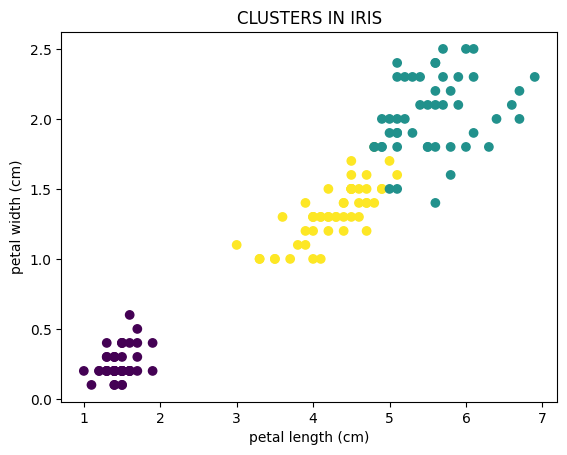

In [ ]:
#showing the clusters in graph

plt.scatter(dfk['petal length (cm)'], dfk['petal width (cm)'], c=y_predicted)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('CLUSTERS IN IRIS')

In [ ]:
cluster_centers = model_km.cluster_centers_
cluster_centers

array([[5.57346939, 2.03265306, 2.        ],
       [1.462     , 0.246     , 0.        ],
       [4.26470588, 1.33333333, 1.01960784]])

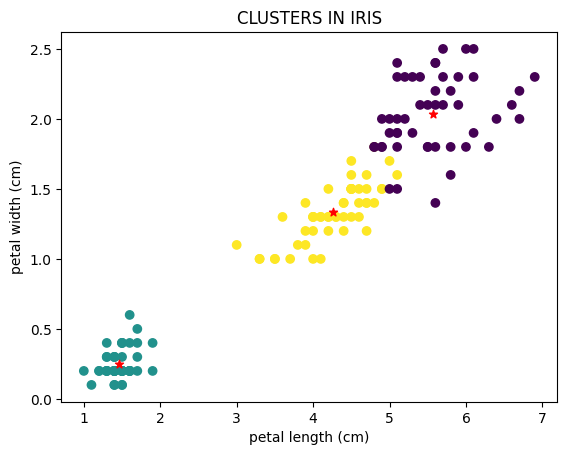

In [ ]:
plt.scatter(dfk['petal length (cm)'], dfk['petal width (cm)'], c=y_predicted)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('CLUSTERS IN IRIS')
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], color='red', marker='*', label='centroid')

In [ ]:
k_rng = range(1,20)
sse = []
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(dfk)
  sse.append(km.inertia_)

In [ ]:
sse

[650.8953333333333,
 112.11808674985141,
 33.31546138455382,
 23.17401320450887,
 20.256200000000003,
 11.994559139784945,
 9.92991021030838,
 9.037430369401767,
 7.991000933706818,
 6.422699023199025,
 5.518162735956851,
 5.2778683889210205,
 5.604337301587303,
 4.765940614940614,
 4.0744189640768615,
 4.1493560883560905,
 3.7580494015788117,
 3.407928656311009,
 3.175118750980821]

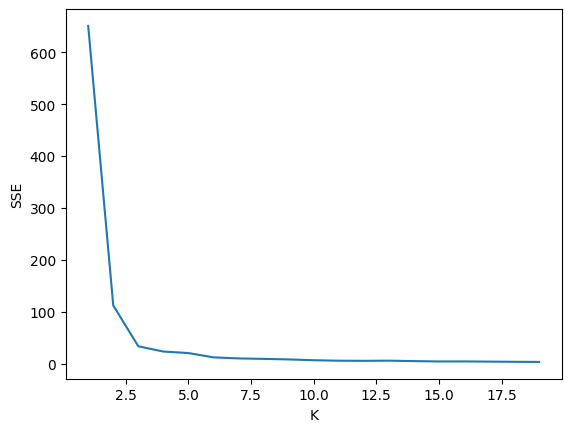

In [ ]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng, sse)